# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aditya Alfauzi
- **Email:** adityaalfauzi21@gmail.com
- **ID Dicoding:** alfauziaditya

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca mempengaruhi total penyewaan sepeda?
- Bagaimana perbedaan pola penyewaan sepeda antara musim (Spring, Summer, Fall, Winter)?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [9]:
#Load data dari file csv
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

In [ ]:
#Menampilkan 5 baris pertama data per hari
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Menampilkan 5 baris pertama data per jam
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Diperoleh data "weathersit" dan "cnt" untuk menjawab pertanyaan 1
- Diperoleh data "season" dan "cnt" untuk menjawab pertanyaan 2

### Assessing Data

In [13]:
# Memeriksa informasi umum dari dataframe day_df
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Memeriksa apakah ada nilai yang kosong (missing values)
print("Jumlah Missing Values di day_df:")
print(day_df.isna().sum())

Jumlah Missing Values di day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
# Memeriksa apakah ada data yang terduplikasi
print("Jumlah Duplikasi Data di day_df:")
print(day_df.duplicated().sum())

Jumlah Duplikasi Data di day_df:
0


In [14]:
# Memeriksa info dari hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
# Memeriksa missing values di hour_df
print("Jumlah Missing Values data di hour_df")
print(hour_df.isna().sum())

Jumlah Missing Values data di hour_df
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [16]:
# Memeriksa apakah ada data yang terduplikasi
print("Jumlah Duplikasi Data di hour_df:")
print(day_df.duplicated().sum())

Jumlah Duplikasi Data di hour_df:
0


**Insight:**
- Kedua dataset tidak memiliki missing values maupun data duplikat
- Ditemukan satu masalah pada kedua data, yaitu kolom "dteday" masih bertipe object(teks)

### Cleaning Data

In [17]:
# Mengubah tipe data 'dteday' pada kedua dataframe menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [19]:
# Memeriksa ulang tipe data setelah diubah
print("Tipe data day_df setelah cleaning:")
day_df.info()

Tipe data day_df setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64      

In [20]:
print("Tipe data hour_df setelah cleaning:")
hour_df.info()

Tipe data hour_df setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64 

**Insight:**
- Perbaikan data telah dilakukan pada kolom "dteday", yaitu mengubahnya dari tipe object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
# Eksplorasi dampak cuaca terhadap jumlah sewa
day_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                           
             max  min         mean      sum
weathersit                                 
1           8714  431  4876.786177  2257952
2           8362  605  4035.862348   996858
3           4639   22  1803.285714    37869

In [23]:
# Eksplorasi dampak musim terhadap jumlah sewa
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                            
         max   min         mean      sum
season                                  
1       7836   431  2604.132597   471348
2       8362   795  4992.331522   918589
3       8714  1115  5644.303191  1061129
4       8555    22  4728.162921   841613

**Insight:**
- Penyewaan paling tinggi terjadi saat cuaca cerah/sedikit berawan, saat cuaca berawan rata-ratanya menurun, dan saat hujam/salju penyewaannya paling rendah
- Penyewaan paling tinggi terjadi saat Fall dan Summer, sedangkan saat Spring rata-rata penyewaannya paling rendah

## Visualization & Explanatory Analysis

### Pertanyaan 1:

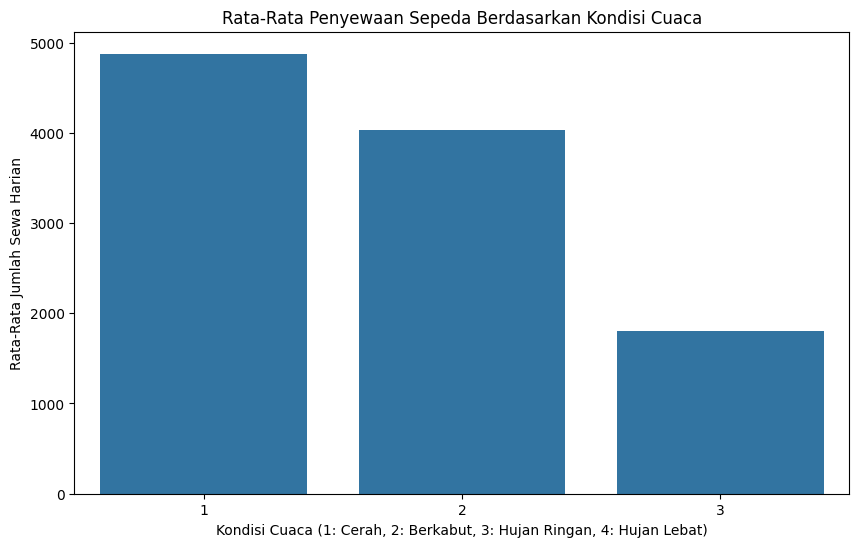

In [25]:
# Menyiapkan data untuk plot
weather_df = day_df.groupby("weathersit").agg({
    "cnt": "mean"
}).reset_index()

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="weathersit", 
    y="cnt",
    data=weather_df
)
plt.title("Rata-Rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1: Cerah, 2: Berkabut, 3: Hujan Ringan, 4: Hujan Lebat)")
plt.ylabel("Rata-Rata Jumlah Sewa Harian")
plt.show()

### Pertanyaan 2:

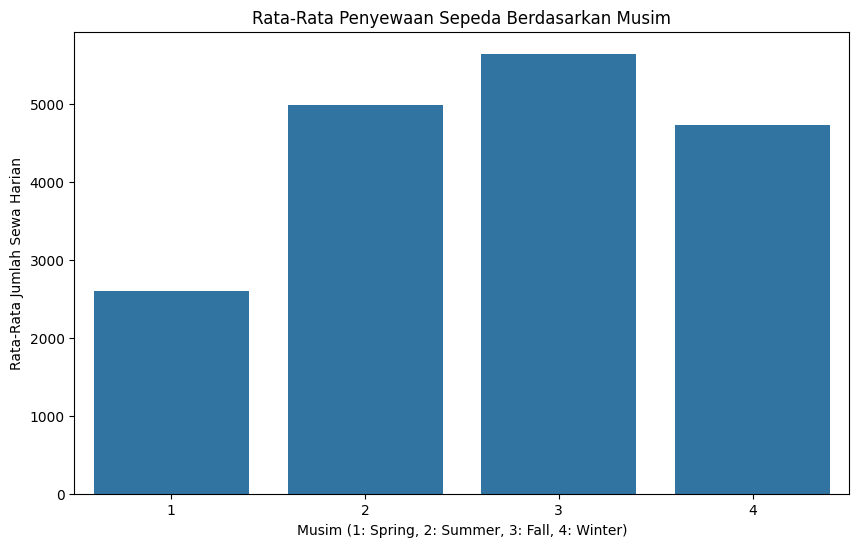

In [26]:
# Menyiapkan data untuk plot
season_df = day_df.groupby("season").agg({
    "cnt": "mean"
}).reset_index()

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="season", 
    y="cnt",
    data=season_df
)
plt.title("Rata-Rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Rata-Rata Jumlah Sewa Harian")
plt.show()

**Insight:**
- Visualisasi data secara efektif mengonfirmasi temuan dari tahap EDA. Grafik batang untuk kondisi cuaca dengan jelas memperlihatkan penurunan tajam jumlah sewa seiring memburuknya cuaca. Ini adalah cara paling cepat untuk menunjukkan betapa krusialnya faktor cuaca.
- Grafik perbandingan musim secara visual menampilkan peringkat permintaan sewa. Terlihat jelas bahwa musim Fall (gugur) adalah puncak dari bisnis ini, sementara musim Spring (semi) adalah yang paling sepi. Visualisasi ini mempermudah pemangku kepentingan untuk memahami siklus bisnis tahunan dalam sekejap.

## Analisis Lanjutan (Opsional)

## Conclusion

- Kesimpulan pertanyaan 1 : Berdasarkan analisis data, dapat disimpulkan bahwa kondisi cuaca memiliki dampak yang sangat signifikan terhadap jumlah penyewaan sepeda. Jumlah sewa tertinggi tercatat pada hari dengan cuaca cerah dan menurun drastis seiring memburuknya cuaca (berkabut atau hujan).
- Kesimpulan pertanyaan 2 : Pola penyewaan sepeda sangat bervariasi antar musim. Permintaan mencapai puncaknya pada musim gugur (Fall), diikuti oleh musim panas (Summer). Sebaliknya, musim semi (Spring) menunjukkan jumlah penyewaan terendah, mengindikasikan adanya siklus bisnis tahunan yang kuat.